### Flowcast Data Science Challange

### Download the data

In [1]:
! git clone https://github.com/flowcast/datasci-challenge.git

Cloning into 'datasci-challenge'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [2]:
! unzip datasci-challenge/transactions.zip

Archive:  datasci-challenge/transactions.zip
  inflating: transactions.txt        


In [3]:
! cat datasci-challenge/README.md

# Data Science Challenge
transactions.zip contains synthetic, line-delimited JSON data for the data science recruiting process.


The data has been downloaded and is in csv format. The name of the data file is transactions.txt. Let's load the data to understand it.

### Exploratory Data Analysis

In [1]:
! head -n 1 transactions.txt

{"accountNumber": "733493772", "customerId": "733493772", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-01-08T19:04:50", "transactionAmount": 111.33, "merchantName": "Lyft", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "05", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "04/2020", "accountOpenDate": "2014-08-03", "dateOfLastAddressChange": "2014-08-03", "cardCVV": "492", "enteredCVV": "492", "cardLast4Digits": "9184", "transactionType": "PURCHASE", "isFraud": true, "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false}


Data looks like in the json format. 

In [2]:
# basic imports
import pandas as pd
pd.set_option('MAX_COLUMNS',50)
pd.set_option('MAX_ROWS',500)
import datetime
import json
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# Since the file is json, first reading it and then using pandas functionality to convert it to dataframe
file = 'transactions.txt'
with open(file) as data_file:
    dict_data = pd.read_json(data_file,  lines=True)

In [4]:
dict_data.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [5]:
# Looking at some of the merchant names
dict_data.merchantName.value_counts(ascending=True)[0:10]

Runners #762536                  1
Boost Mobile #745135             1
Virgin #683645                   1
EZ Wireless #640866              1
Fast Mobile #685186              1
Sprint Communications #485210    1
Sprint PCS #989856               2
Curves #906709                   2
Sprint Communications #39784     2
Sprint Communications #185844    3
Name: merchantName, dtype: int64

In [5]:
#Correcting merchant names
dict_data.merchantName = dict_data.merchantName.apply(lambda x: x.split('#')[0])

In [6]:
#Looking at some of the fraud samples
dict_data[dict_data.isFraud==True].sample(6)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
173090,933161627,2012-03-30,US,1202.32,510,2833,False,5000,3797.68,01/2027,933161627,2012-03-30,,510,False,True,rideshare,,US,Uber,,,01,09,,,273.43,2016-11-01T03:49:59,PURCHASE
187370,113550386,2015-07-21,US,527.58,719,4292,False,7500,6972.42,02/2021,113550386,2015-07-21,,719,False,True,online_retail,,US,gap.com,,,01,02,,,190.19,2016-03-06T23:18:13,PURCHASE
8405,946817886,2014-04-14,US,48837.87,645,3822,True,50000,1162.13,02/2025,946817886,2014-04-14,,645,False,True,fastfood,,US,KFC,,,01,09,,,207.09,2016-11-19T04:09:29,PURCHASE
181666,303755466,2013-12-08,US,6466.62,495,9209,True,7500,1033.38,08/2019,303755466,2013-12-08,,495,False,True,fastfood,,US,Krispy Kreme,,,01,05,,,70.86,2016-02-14T10:32:49,PURCHASE
281636,695492434,2014-01-04,US,4103.80,690,1426,False,5000,896.20,07/2021,695492434,2014-01-04,,690,False,True,online_retail,,US,sears.com,,,01,05,,,342.01,2016-10-24T14:33:43,PURCHASE
512666,224704824,2013-02-22,US,500.00,861,5951,True,500,0.00,07/2018,224704824,2013-02-22,,861,False,True,health,,US,WSC,,,01,09,,,338.18,2016-02-02T07:17:29,PURCHASE


In [7]:
def get_difference(row, col1, col2):
    """
    Function to get the difference of time in days given a row in the dataset.
    row: dataset row
    col1: string of date in %Y-%m-%d format
    col2: string of date in %Y-%m-%d format
    """
    # col2> col1
    date1 = row[col1]
    date2 = row[col2]
    dt1 = datetime.datetime.strptime(date1,'%Y-%m-%d')
    dt2 = datetime.datetime.strptime(date2,'%Y-%m-%d')
    elapsedTime = dt2 - dt1
    return elapsedTime.days

In [8]:
# Also let's create some meaningful date features
dict_data['currentExpDate_year'] = dict_data.currentExpDate.apply(lambda x: x.split('/')[1])
dict_data['account_open_year'] = dict_data.accountOpenDate.apply(lambda x: x.split('-')[0])
dict_data['transaction_date'] = dict_data.transactionDateTime.apply(lambda x: x.split('T')[0])
dict_data['last_address_change_days'] = dict_data.apply(get_difference, col1='dateOfLastAddressChange', col2='transaction_date', axis=1)
dict_data['account_open_days'] = dict_data.apply(get_difference, col1='accountOpenDate', col2='transaction_date', axis=1)

In [9]:
# Creating transaction date time features
dict_data['transaction_day'] = dict_data.transaction_date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday())
dict_data['transaction_hour'] = dict_data.transactionDateTime.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)
dict_data['transaction_month'] = dict_data.transactionDateTime.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').month)

In [10]:
dict_data['accountNumber_card_unique'] = dict_data['accountNumber'].astype(str)+'-'+dict_data['cardLast4Digits'].astype(str)

#### Data Assumptions
Before starting to develop the model following assumptions are taken:
1. All merchant names are unique
2. Customer ID, Account Number, CVV, Last4Digits are customer specific columns and shoudn't be used in the modelling.
3. Transaction type == PURCHASE represents a sale.
4. All the transactions are in the same currency
5. All the times are in same timezone
6. Cards are not blocked after fraud transactions.
7. In general, there are features which are useful for this task but are not available to us.

In [11]:
# Getting the ratio of classes
dict_data.isFraud.value_counts()

False    630612
True      11302
Name: isFraud, dtype: int64

**We have a very low percentage of Fraud transactions.** Just 11k out of 630k, about 2% of the data.

In [12]:
dict_data.transactionType.value_counts()

PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
                           589
Name: transactionType, dtype: int64

Most of the transactions are of Purchase with represent customer spending

### Categorical variable distribution analysis

In [55]:
def plot_distribution_cat(data, col):
    '''
    Creates a barplot of counts for target with respect to the categorical variable
    '''
    temp_data = data.groupby([col, 'isFraud']).count().reset_index().rename({'accountNumber':'Counts'}, axis='columns').sort_values([col,'isFraud'], ascending=True)
    g = sns.catplot(x=col,y='Counts' ,data=temp_data.iloc[0:150],height=5, kind='bar',aspect=6,hue='isFraud', palette="Set3",)
    g.set(title='Number Transaction w.r.t transaction type and '+str(col))
    g.set_axis_labels(x_var=col, y_var='Counts')
    g.set_xticklabels(rotation=90)

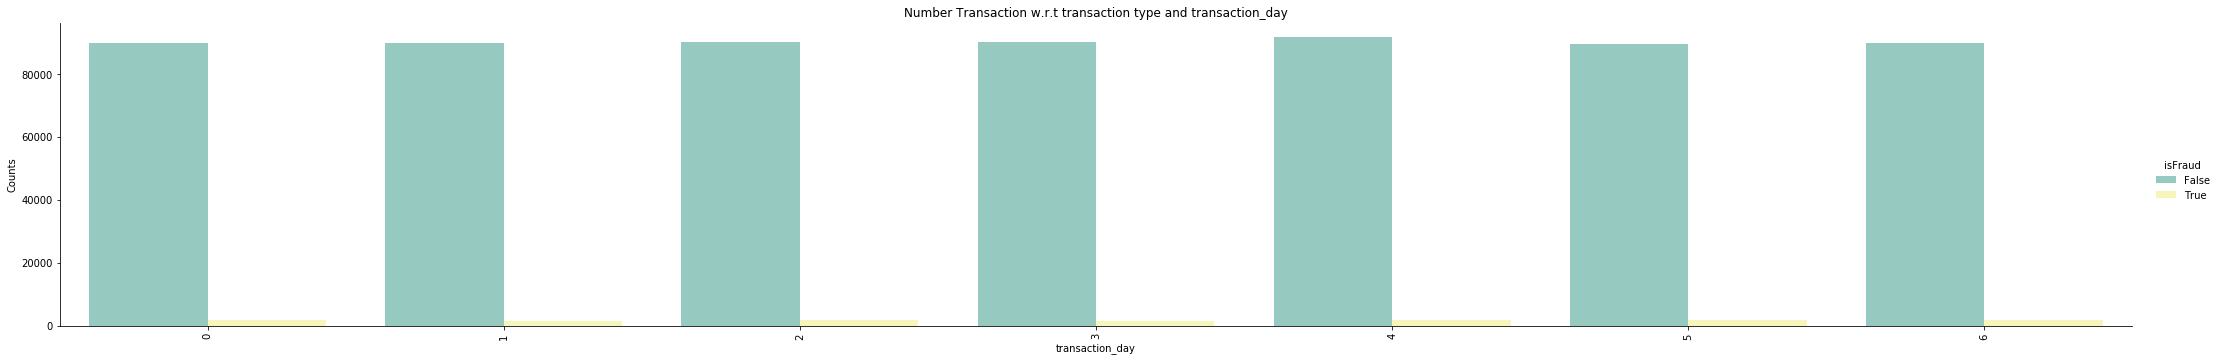

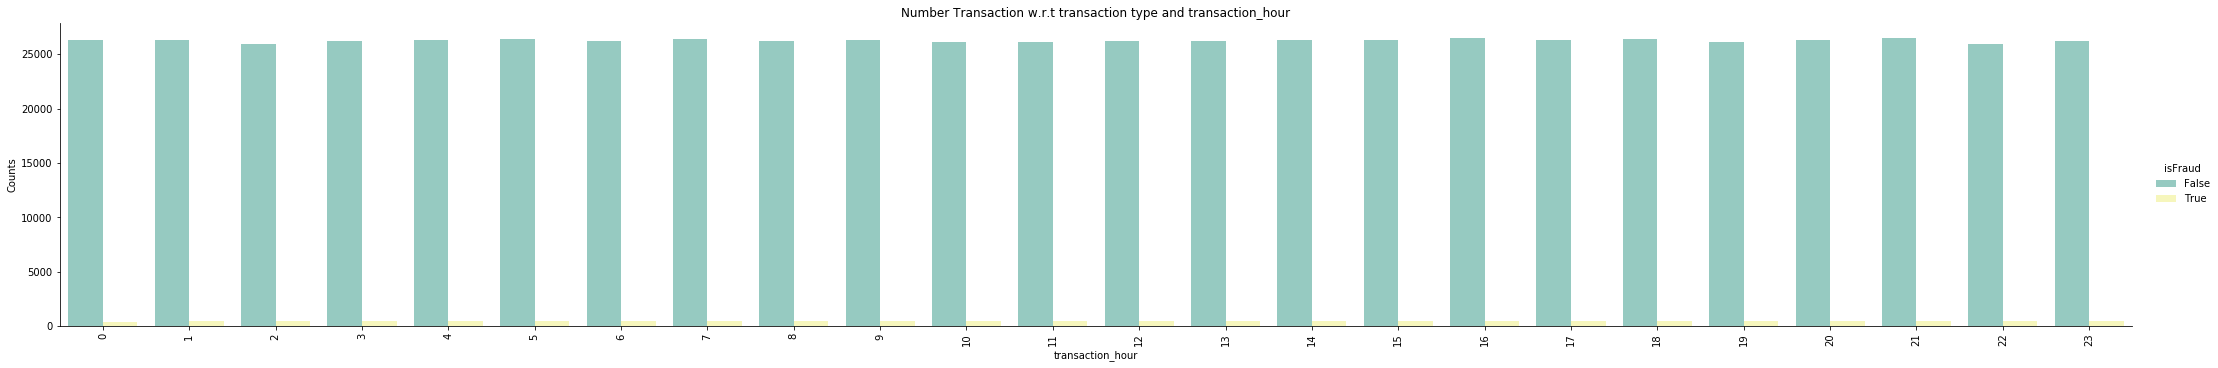

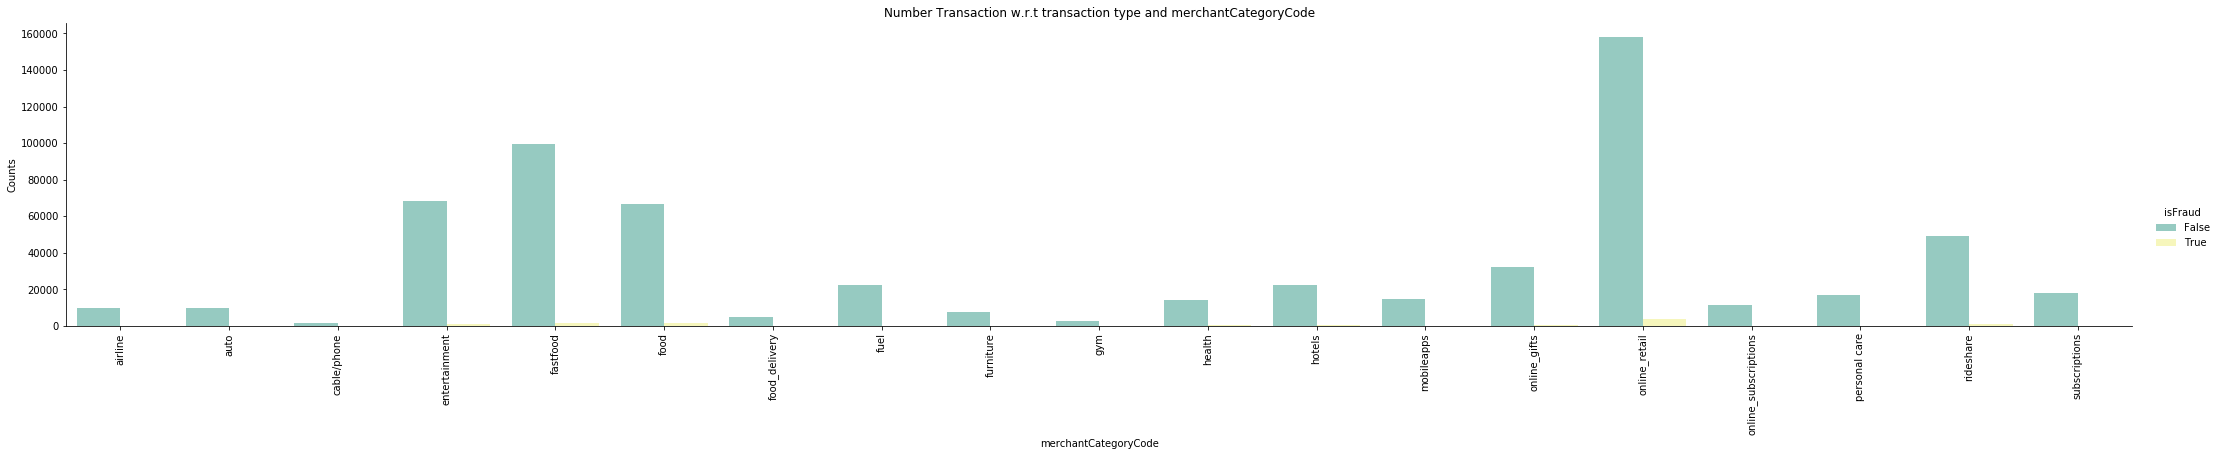

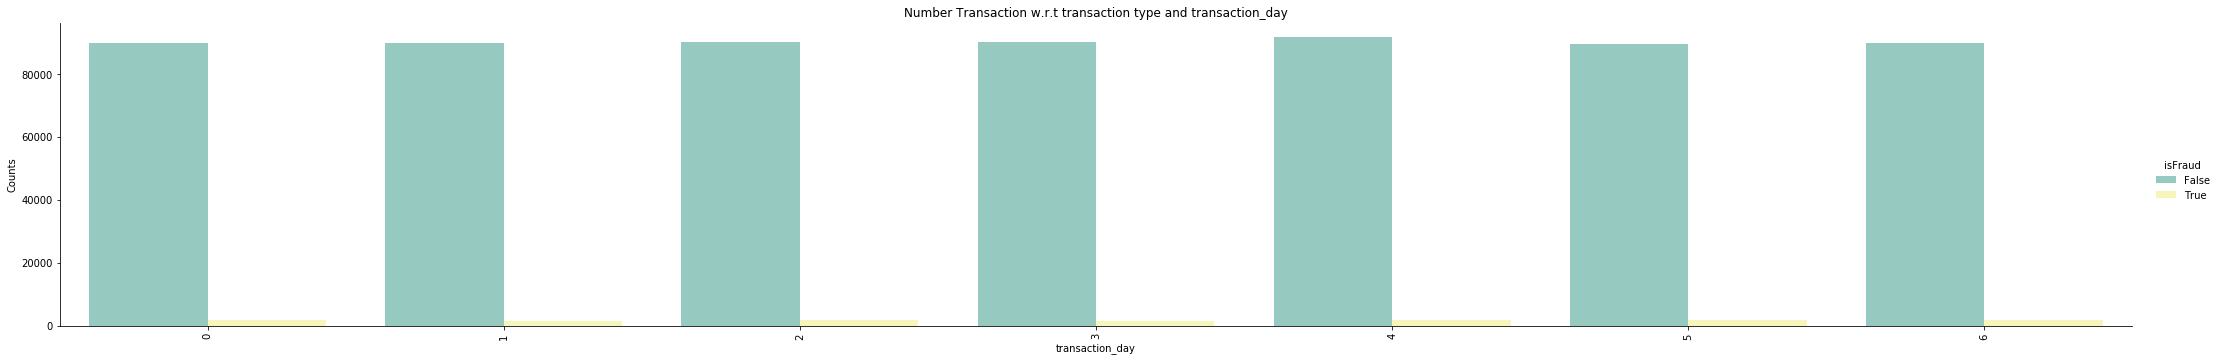

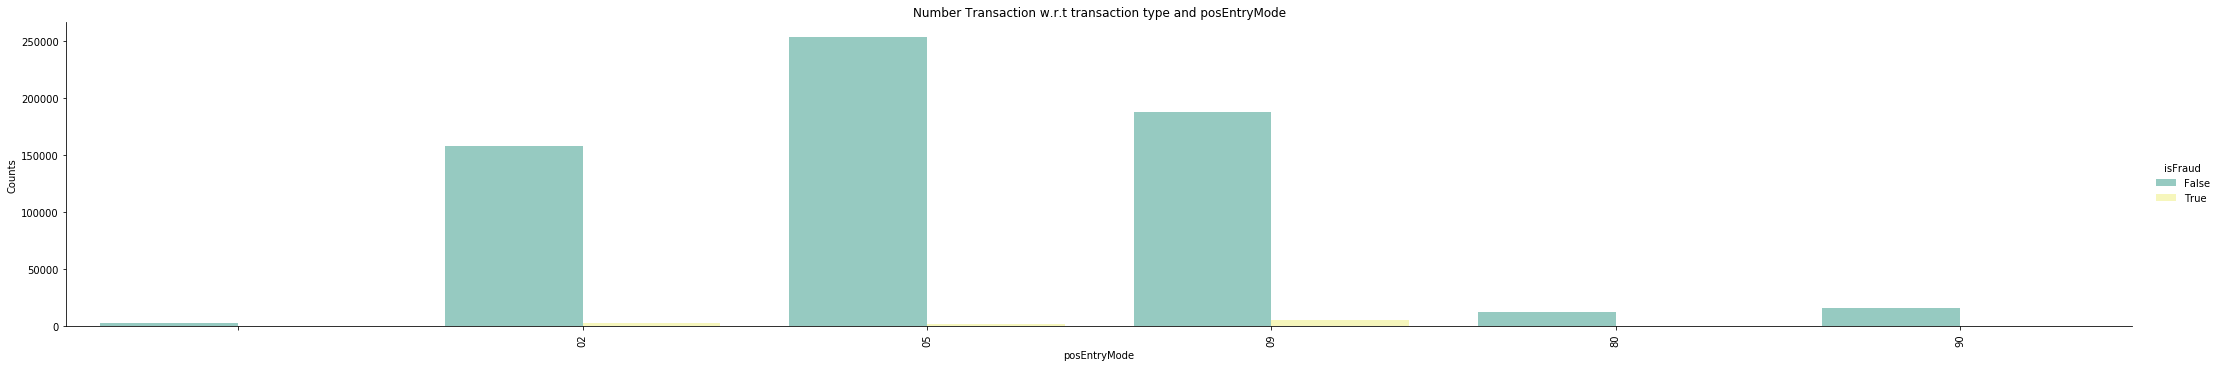

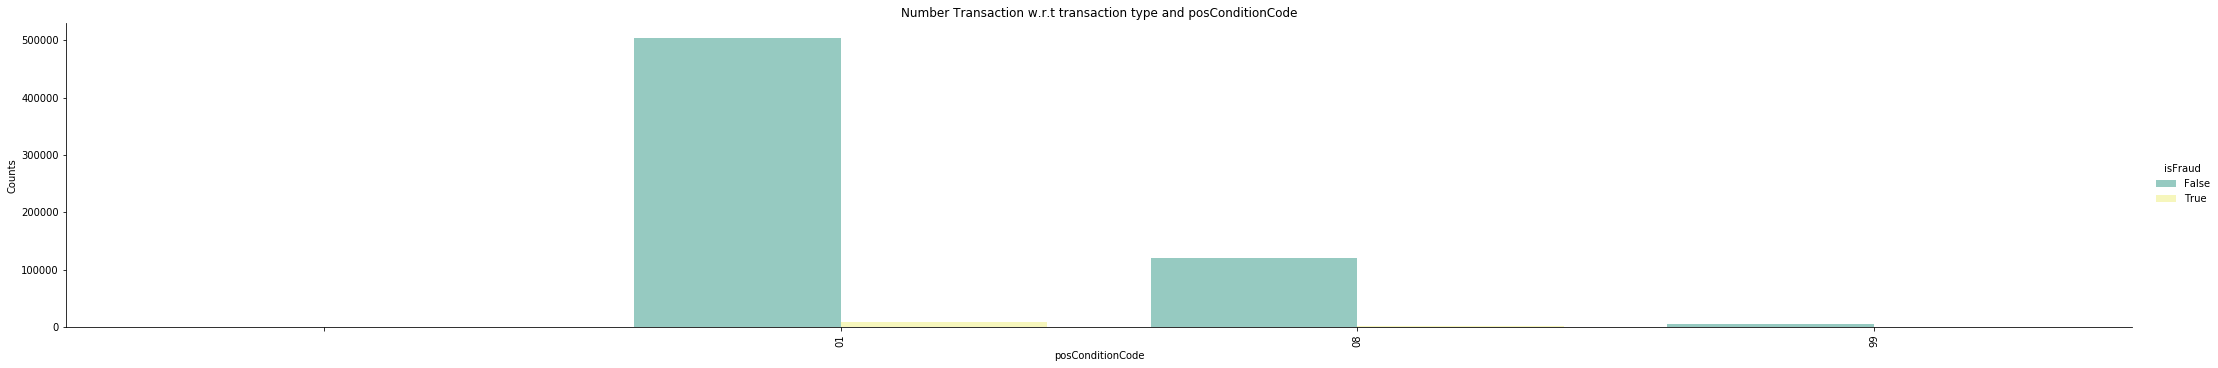

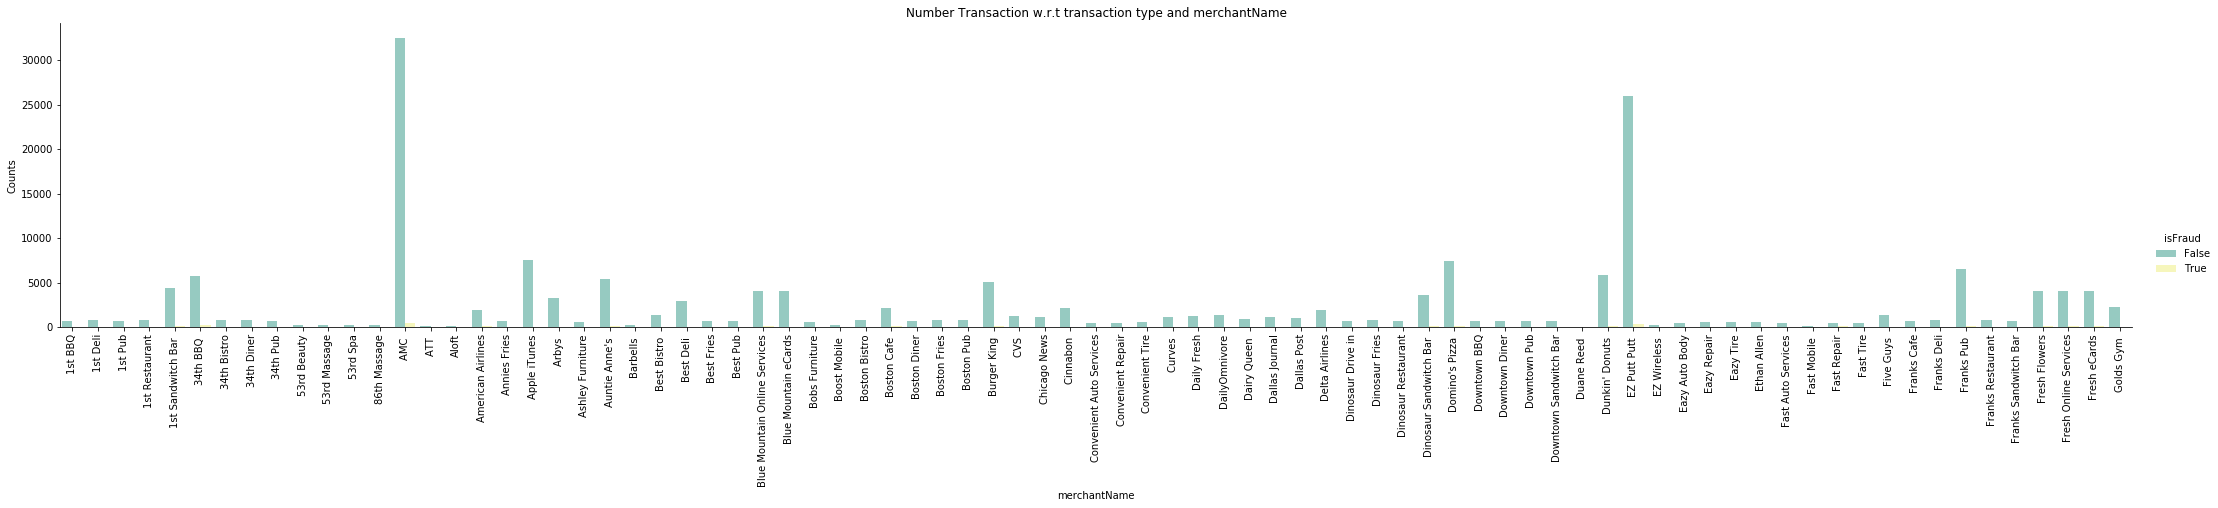

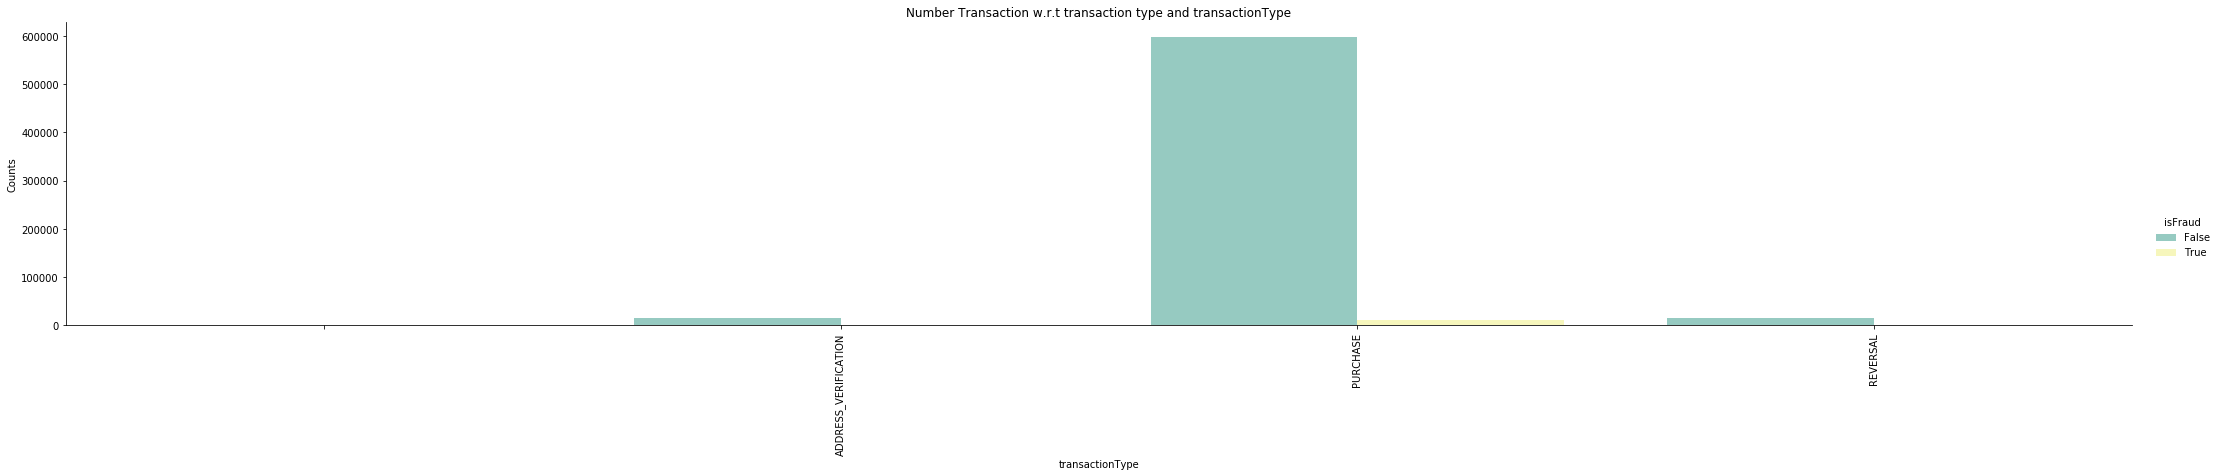

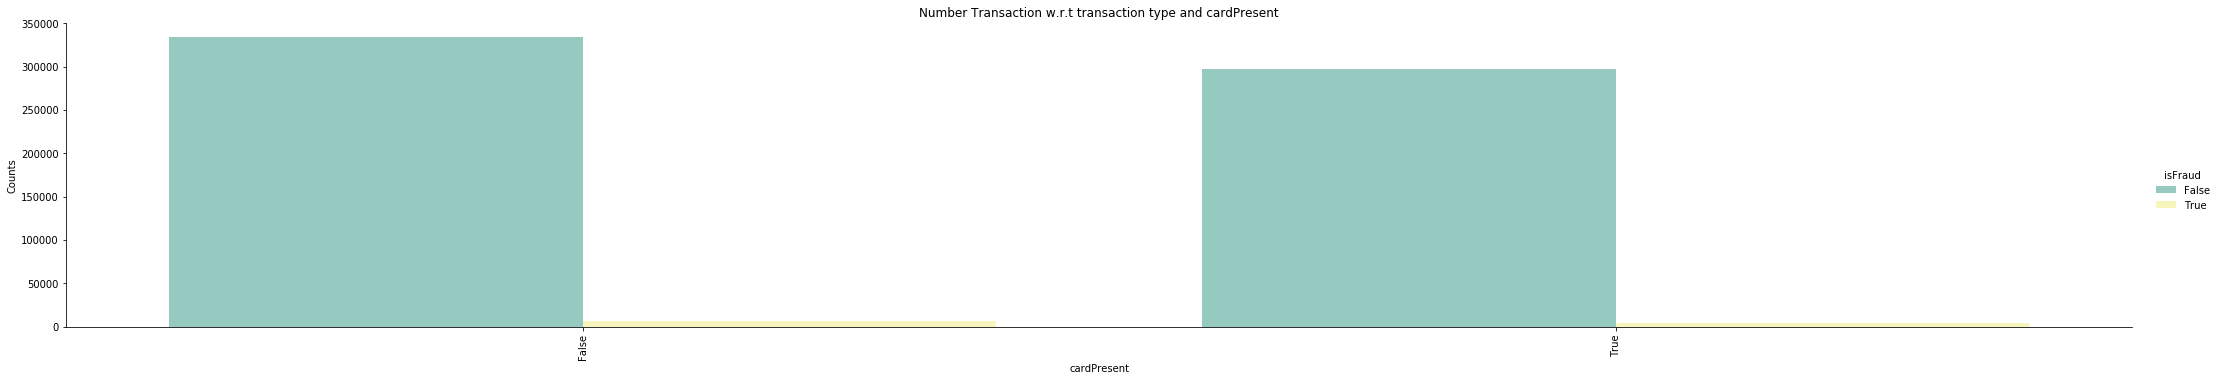

In [56]:
plot_distribution_cat(dict_data, 'transaction_day')
plot_distribution_cat(dict_data, 'transaction_hour')
plot_distribution_cat(dict_data, 'merchantCategoryCode')
plot_distribution_cat(dict_data, 'transaction_day')
plot_distribution_cat(dict_data, 'posEntryMode')
plot_distribution_cat(dict_data, 'posConditionCode')
plot_distribution_cat(dict_data, 'merchantName')
plot_distribution_cat(dict_data, 'transactionType')
plot_distribution_cat(dict_data, 'cardPresent')

In [14]:
dict_data['target'] = dict_data.isFraud.astype(float)

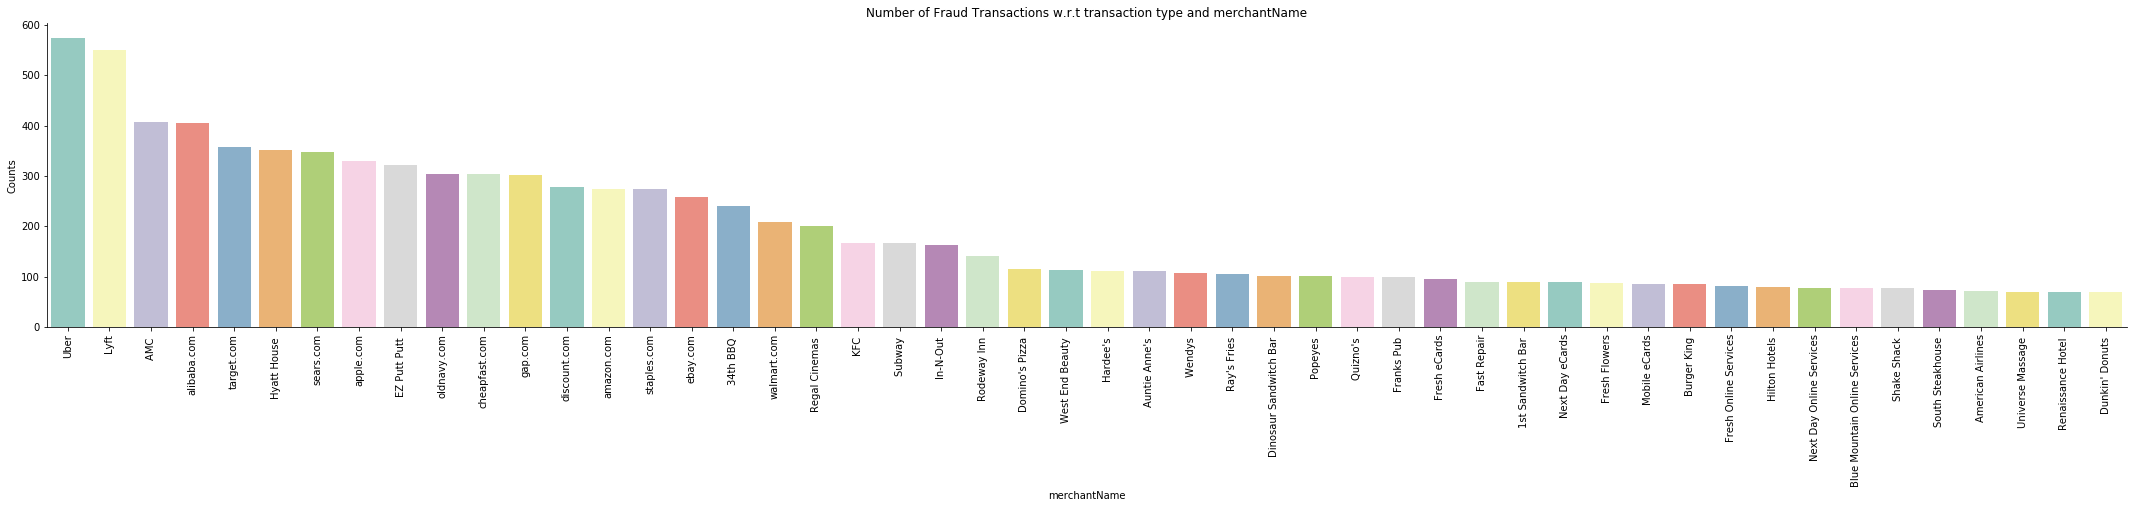

In [36]:
# plotting the merchant having highest fraud transacation
col = 'merchantName'
temp_data = dict_data[dict_data.isFraud==False].groupby(col).mean().reset_index().rename({'accountNumber':'Counts'}, axis='columns').sort_values('Counts', ascending=False)
g = sns.catplot(x=col,y='Counts' ,data=temp_data.iloc[0:50],height=5, kind='bar',aspect=6, palette="Set3",)
g.set(title='Number of Fraud Transactions w.r.t transaction type and '+str(col))
g.set_axis_labels(x_var=col, y_var='Counts')
g.set_xticklabels(rotation=90)

In [29]:
# plotting the merchant having highest fraud transacation ratio
col = 'merchantName'
counts_by_col = dict_data.groupby([col,"isFraud"]).agg('count').reset_index()[[col,'isFraud','accountNumber']]
counts_by_col.head()
counts_by_col_pivot = counts_by_col.pivot(index='merchantName', columns='isFraud', values='accountNumber').reset_index()
counts_by_col_pivot['ratio'] = counts_by_col_pivot[True]/counts_by_col_pivot[False]

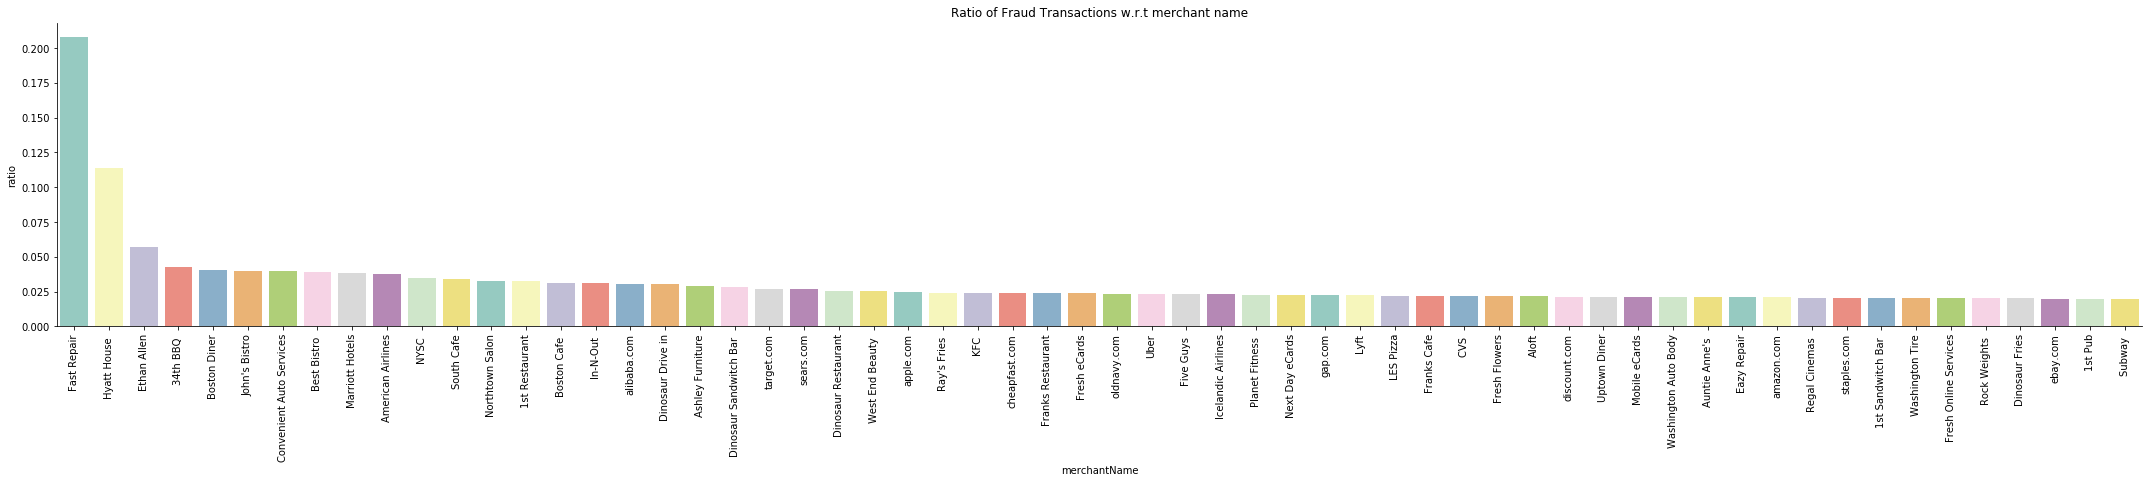

In [33]:
counts_by_col_pivot.sort_values('ratio', ascending=False).head()
g = sns.catplot(x='merchantName',y='ratio' ,data=counts_by_col_pivot.sort_values('ratio', ascending=False)[0:60],height=5, kind='bar',aspect=6, palette="Set3",)
g.set(title='Ratio of Fraud Transactions w.r.t merchant name')
g.set_axis_labels(x_var=col, y_var='ratio')
g.set_xticklabels(rotation=90)

Observations:
1. No significant difference for Fraud and Non-Fraud  is found for these categories of transactions.
2. In general most fraud happens with Online retail, but proportionally online retail also has most number of Transactions.
3. Uber, Lyft and AMC has most fraud transactions by number. 
4. FastRpair, Hyatt, Ethan Allen has most fraud transaction rates.

### Continous variable distribution analysis
Let's look at the distribution of continous variables for Fraud and non-Fraud Transactions. Such a distribution will tell us how fraud txns differs from non-fraud ones.

In [18]:
def create_distributions(col, fraud, non_fraud):
    '''
    Creates the normalized distribution of a variable for both fraud and non fraud transactions.
    '''
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
    sns.distplot(fraud[col],ax=ax1, fit=norm, color='#FB8861')
    ax1.set_title('Fraud Distribution with '+ col, fontsize=14)
    sns.distplot(non_fraud[col],ax=ax2, fit=norm, color='#56F9BB')
    ax2.set_title('Non Fraud Distribution with '+ col , fontsize=14)

/Users/212717082/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


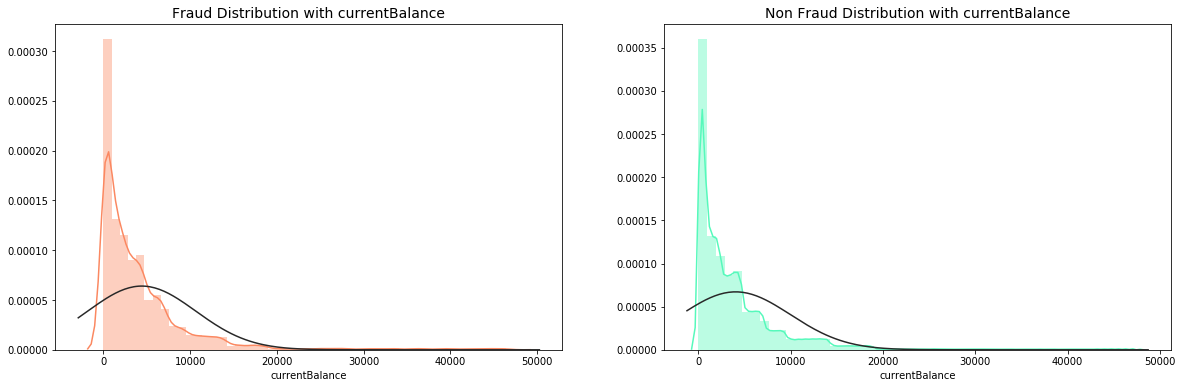

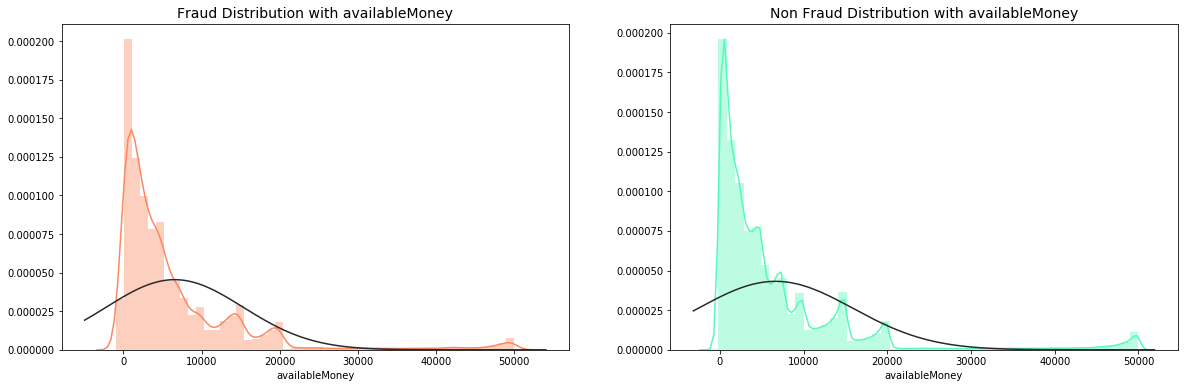

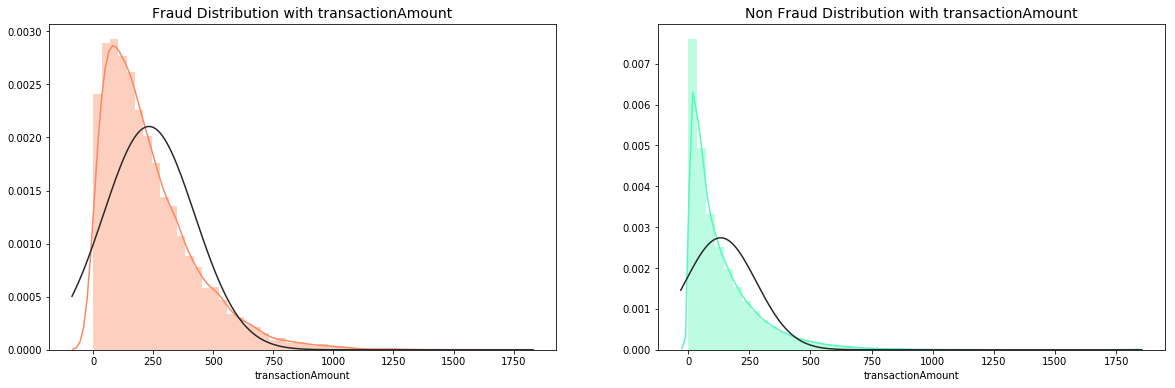

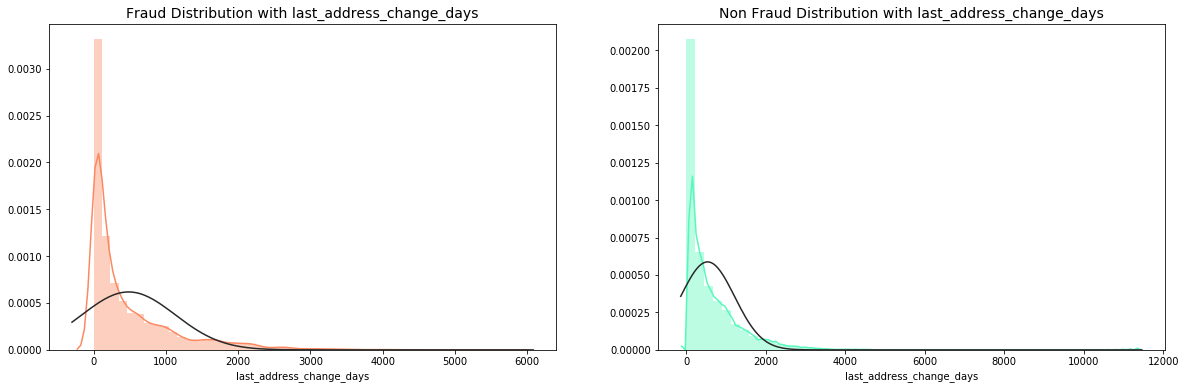

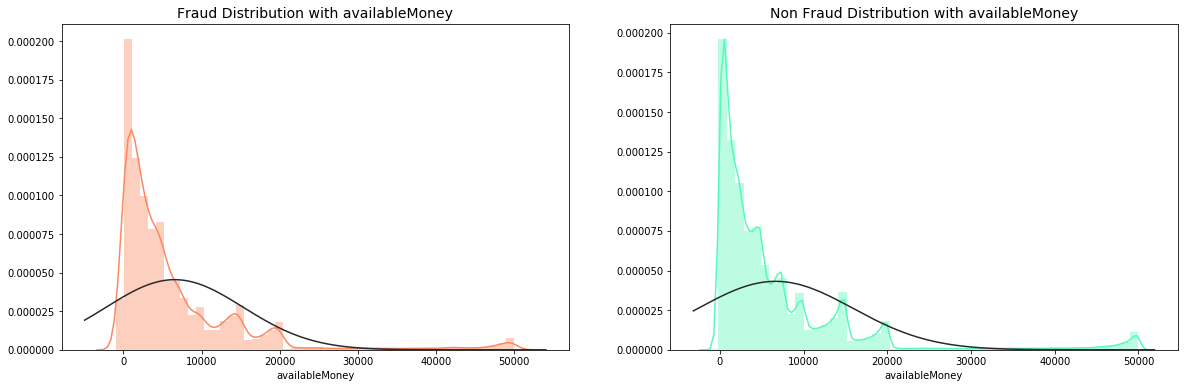

In [19]:
fraud = dict_data[dict_data.isFraud==True]
non_fraud = dict_data[dict_data.isFraud==False]
create_distributions('currentBalance', fraud, non_fraud)
create_distributions('availableMoney', fraud, non_fraud)
create_distributions('transactionAmount', fraud, non_fraud)
create_distributions('last_address_change_days', fraud, non_fraud)
create_distributions('availableMoney', fraud, non_fraud)

Observations: There is very narrow distribution of transaction amount for Non-Fraud transaction as compared to fraud ones. However with other variables the distribution is same w.r.t Fraud and Non-Fraud. We should also look at the Average Transaction amount by the category and account to understand his **spending behaviour**

### Spending Behaviour Analysis

First Create some features which will give the idea of spending. We will create two types of spendings. 
1. Legit Spending by customer every month on each categories
2. Legit Spending by all customers every month on each categories. 

**Here Legit spending mean on Non-Fraud transactions which are representing a sale or Purchase.**

#### Legit Spending by customer every month on each categories
The features we are going to create in this section will provide how much each customer spend per month or year on particular category of items such as Entertainment , Food etc. Also It will be helpful to know them since any out of behavior transaction might me a fraud one.

Also we will take the differnce of these columns with Transaction amount to know how much this transaction differs from that customer's spending pattern.

In [ ]:
'''
The below code creates the columns which represent customer behaviour, which could 
be mean, max, min spending on particular categories and with particular merchant
'''
legit_txn = dict_data[(dict_data.isFraud==False) & (dict_data.transactionType=='PURCHASE')]
legit_txn_select = legit_txn[['customerId','merchantCategoryCode','transaction_month','transactionAmount']]
for kind in ['max', 'min', 'sum', 'mean']:
    print(kind)
    col = kind+'_cust_spend_by_cat_month'
    temp = legit_txn_select.groupby(['customerId','merchantCategoryCode','transaction_month']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['customerId','merchantCategoryCode','transaction_month',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['customerId','merchantCategoryCode','transaction_month'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col]
    
    
legit_txn_select = legit_txn[['accountNumber','merchantCategoryCode','transaction_month','transactionAmount']]
for kind in ['max', 'min', 'sum', 'mean']:
    print(kind)
    col = kind+'_account_spend_by_cat_month'
    temp = legit_txn_select.groupby(['accountNumber','merchantCategoryCode','transaction_month']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['accountNumber','merchantCategoryCode','transaction_month',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['accountNumber','merchantCategoryCode','transaction_month'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col]
    
    
    
legit_txn = dict_data[(dict_data.isFraud==False) & (dict_data.transactionType=='PURCHASE')]
legit_txn_select = legit_txn[['customerId','merchantCategoryCode','transactionAmount']]

for kind in ['max', 'min', 'mean']:
    print(kind)
    col = kind+'_cust_spend_by_cat'
    temp = legit_txn_select.groupby(['customerId','merchantCategoryCode']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['customerId','merchantCategoryCode',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['customerId','merchantCategoryCode'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col]
    
legit_txn = dict_data[(dict_data.isFraud==False) & (dict_data.transactionType=='PURCHASE')]
legit_txn_select = legit_txn[['customerId','merchantName','transactionAmount']]

for kind in ['max', 'min', 'mean']:
    print(kind)
    col = kind+'_cust_spend_by_merchant'
    temp = legit_txn_select.groupby(['customerId','merchantName']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['customerId','merchantName',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['customerId','merchantName'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col]

legit_txn = dict_data[(dict_data.isFraud==False) & (dict_data.transactionType=='PURCHASE')]
legit_txn_select = legit_txn[['customerId','merchantName','transactionAmount','transaction_month']]
for kind in ['mean']:
    print(kind)
    col = kind+'_cust_spend_by_merchant_month'
    temp = legit_txn_select.groupby(['customerId','merchantName','transaction_month']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['customerId','merchantName','transaction_month',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['customerId','merchantName','transaction_month'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col]
    
    

In [42]:
dict_data.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,...,transaction_day,transaction_hour,transaction_month,accountNumber_card_unique,target,max_cust_spend_by_cat_month,max_cust_spend_by_cat_month_diff,min_cust_spend_by_cat_month,min_cust_spend_by_cat_month_diff,sum_cust_spend_by_cat_month,sum_cust_spend_by_cat_month_diff,mean_cust_spend_by_cat_month,mean_cust_spend_by_cat_month_diff,max_general_spend_by_cat_month,max_general_spend_by_cat_month_diff,min_general_spend_by_cat_month,min_general_spend_by_cat_month_diff,mean_general_spend_by_cat_month,mean_general_spend_by_cat_month_diff,max_cust_spend_by_cat,max_cust_spend_by_cat_diff,min_cust_spend_by_cat,min_cust_spend_by_cat_diff,mean_cust_spend_by_cat,mean_cust_spend_by_cat_diff
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,...,4,19,1,733493772-9184,1.0,247.99,-136.66,24.75,86.58,538.78,-427.45,134.695,-23.365,1362.27,-1250.94,0.02,111.31,149.688887,-38.358887,665.21,-553.88,0.98,110.35,121.171375,-9.841375
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,...,5,22,1,733493772-9184,0.0,247.99,-223.24,24.75,0.00,538.78,-514.03,134.695,-109.945,1362.27,-1337.52,0.02,24.73,149.688887,-124.938887,665.21,-640.46,0.98,23.77,121.171375,-96.421375
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,...,0,13,1,733493772-9184,0.0,247.99,-60.59,24.75,162.65,538.78,-351.38,134.695,52.705,1362.27,-1174.87,0.02,187.38,149.688887,37.711113,665.21,-477.81,0.98,186.42,121.171375,66.228625
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,...,0,22,1,733493772-9184,1.0,247.99,-20.65,24.75,202.59,538.78,-311.44,134.695,92.645,1362.27,-1134.93,0.02,227.32,149.688887,77.651113,665.21,-437.87,0.98,226.36,121.171375,106.168625
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,...,5,1,1,733493772-9184,0.0,247.99,-247.99,24.75,-24.75,538.78,-538.78,134.695,-134.695,1362.27,-1362.27,0.02,-0.02,149.688887,-149.688887,665.21,-665.21,0.98,-0.98,121.171375,-121.171375


#### Legit Spending in general every month on each categories.
The features we are going to create in this section will provide how much a typical customer spend per month or year on particular category of items such as Entertainment , Food etc and also on various merchants such as Amazon. Lyft, Uber etc. It will be helpful to know this information since any out of behavior transaction might me be fraud one.

In [46]:
'''
The below code creates the columns which represent population spending behaviour, which could 
be mean, max, min spending on particular categories and with particular merchant
'''
legit_txn = dict_data[(dict_data.isFraud==False) & (dict_data.transactionType=='PURCHASE')]
legit_txn_select = legit_txn[['merchantCategoryCode','transaction_month','transactionAmount']]
for kind in ['max', 'min', 'mean']:
    print(kind)
    col = kind+'_general_spend_by_cat_month'
    temp = legit_txn_select.groupby(['merchantCategoryCode','transaction_month']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['merchantCategoryCode','transaction_month',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['merchantCategoryCode','transaction_month'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col] 

    
legit_txn = dict_data[(dict_data.isFraud==False) & (dict_data.transactionType=='PURCHASE')]
legit_txn_select = legit_txn[['merchantName','transactionAmount','transaction_month']]
for kind in ['max', 'min', 'mean']:
    print(kind)
    col = kind+'_general_spend_by_merchat'
    temp = legit_txn_select.groupby(['merchantName','transaction_month']).agg(kind).reset_index().rename({'transactionAmount':col}, axis='columns')[['merchantName','transaction_month',col]]
    dict_data = pd.merge(dict_data, temp, how='left', on =['merchantName','transaction_month'])
    dict_data[col+'_diff'] = dict_data['transactionAmount'] - dict_data[col]

max
min
mean


In [47]:
dict_data.head(5)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,...,max_cust_spend_by_cat_month_diff,min_cust_spend_by_cat_month,min_cust_spend_by_cat_month_diff,sum_cust_spend_by_cat_month,sum_cust_spend_by_cat_month_diff,mean_cust_spend_by_cat_month,mean_cust_spend_by_cat_month_diff,max_general_spend_by_cat_month,max_general_spend_by_cat_month_diff,min_general_spend_by_cat_month,min_general_spend_by_cat_month_diff,mean_general_spend_by_cat_month,mean_general_spend_by_cat_month_diff,max_cust_spend_by_cat,max_cust_spend_by_cat_diff,min_cust_spend_by_cat,min_cust_spend_by_cat_diff,mean_cust_spend_by_cat,mean_cust_spend_by_cat_diff,max_general_spend_by_merchat,max_general_spend_by_merchat_diff,min_general_spend_by_merchat,min_general_spend_by_merchat_diff,mean_general_spend_by_merchat,mean_general_spend_by_merchat_diff
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,...,-136.66,24.75,86.58,538.78,-427.45,134.695,-23.365,1362.27,-1250.94,0.02,111.31,149.688887,-38.358887,665.21,-553.88,0.98,110.35,121.171375,-9.841375,1191.98,-1080.65,0.02,111.31,149.873811,-38.543811
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,...,-223.24,24.75,0.00,538.78,-514.03,134.695,-109.945,1362.27,-1337.52,0.02,24.73,149.688887,-124.938887,665.21,-640.46,0.98,23.77,121.171375,-96.421375,1362.27,-1337.52,0.06,24.69,149.500605,-124.750605
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,...,-60.59,24.75,162.65,538.78,-351.38,134.695,52.705,1362.27,-1174.87,0.02,187.38,149.688887,37.711113,665.21,-477.81,0.98,186.42,121.171375,66.228625,1191.98,-1004.58,0.02,187.38,149.873811,37.526189
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,...,-20.65,24.75,202.59,538.78,-311.44,134.695,92.645,1362.27,-1134.93,0.02,227.32,149.688887,77.651113,665.21,-437.87,0.98,226.36,121.171375,106.168625,1191.98,-964.64,0.02,227.32,149.873811,77.466189
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,...,-247.99,24.75,-24.75,538.78,-538.78,134.695,-134.695,1362.27,-1362.27,0.02,-0.02,149.688887,-149.688887,665.21,-665.21,0.98,-0.98,121.171375,-121.171375,1191.98,-1191.98,0.02,-0.02,149.873811,-149.873811


/Users/212717082/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/212717082/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

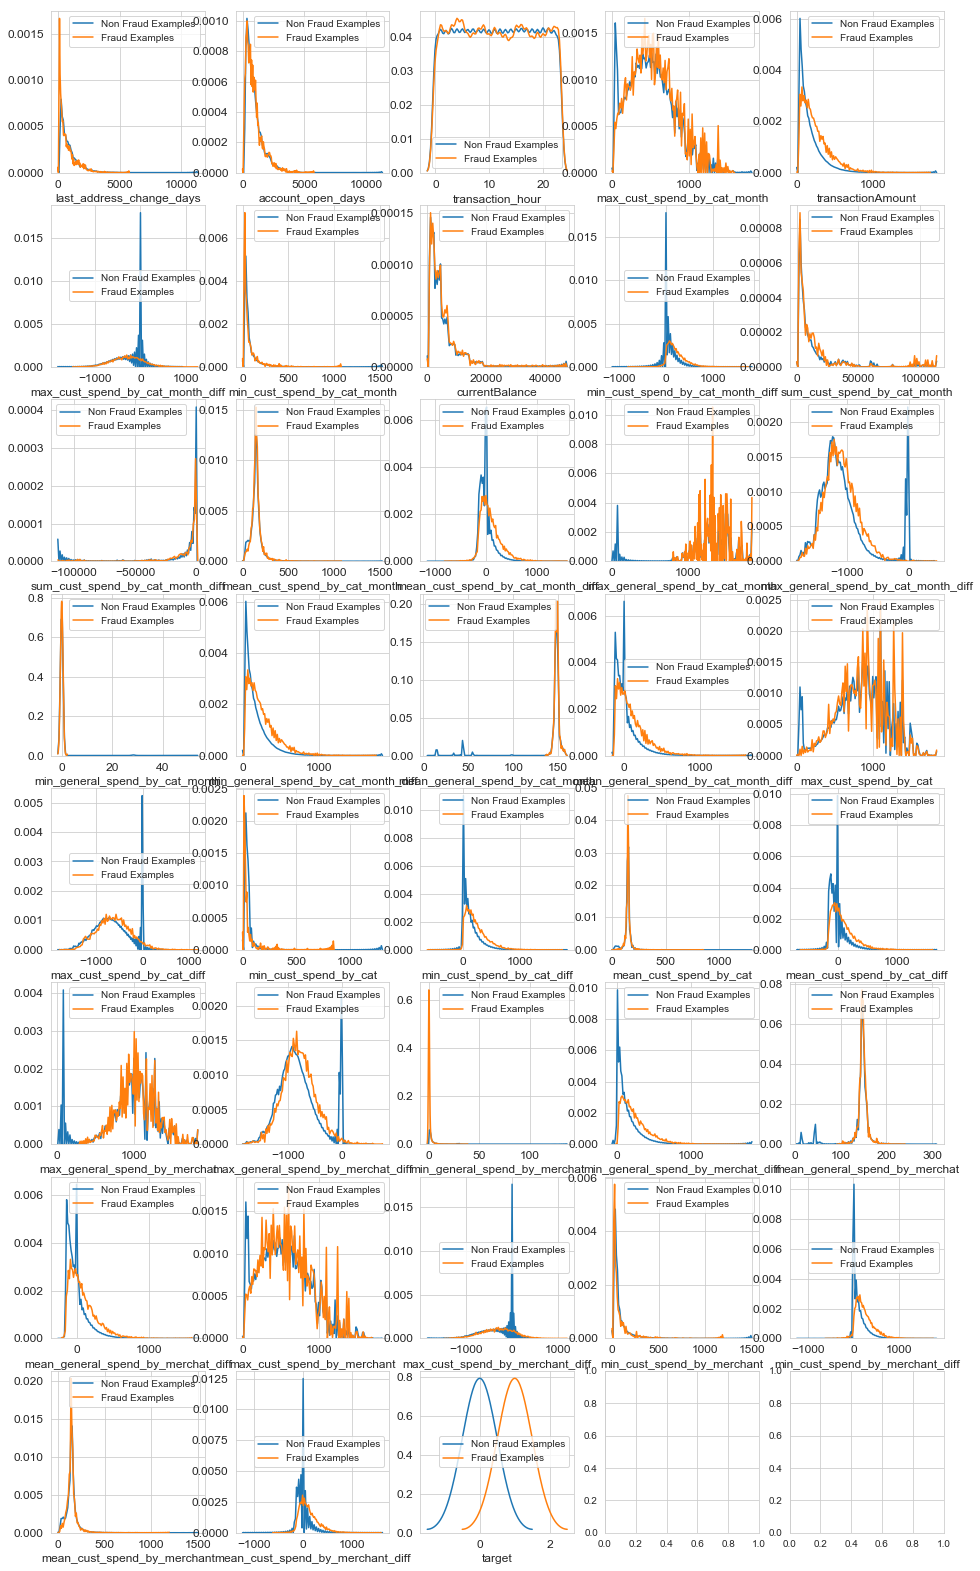

In [141]:
'''
The below code creates plots to compare distribution of fraud and 
non fraud examples with respect to a continous variable
'''
var = col_for_corr
i = 0
t0 = dict_data.loc[dict_data['isFraud'] == False]
t1 = dict_data.loc[dict_data['isFraud'] == True]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,5,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,5,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Non Fraud Examples")
    sns.kdeplot(t1[feature], bw=0.5,label="Fraud Examples")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

**Observations**
1. For most of the variables, its not easy to distinguish the distribution of different classes, but some of the features such as *min_cust_spend_by_cat_month_diff, mean_cust_spend_by_cat_month_diff, mean_cust_spend_by_merchant_diff* might be able to help.
2. The problem looks very challanging since distribution with respect to target class is very similar. An anomaly detection based model might not be able to help here much.

Text(0.5,1,' Correlation Matrix ')

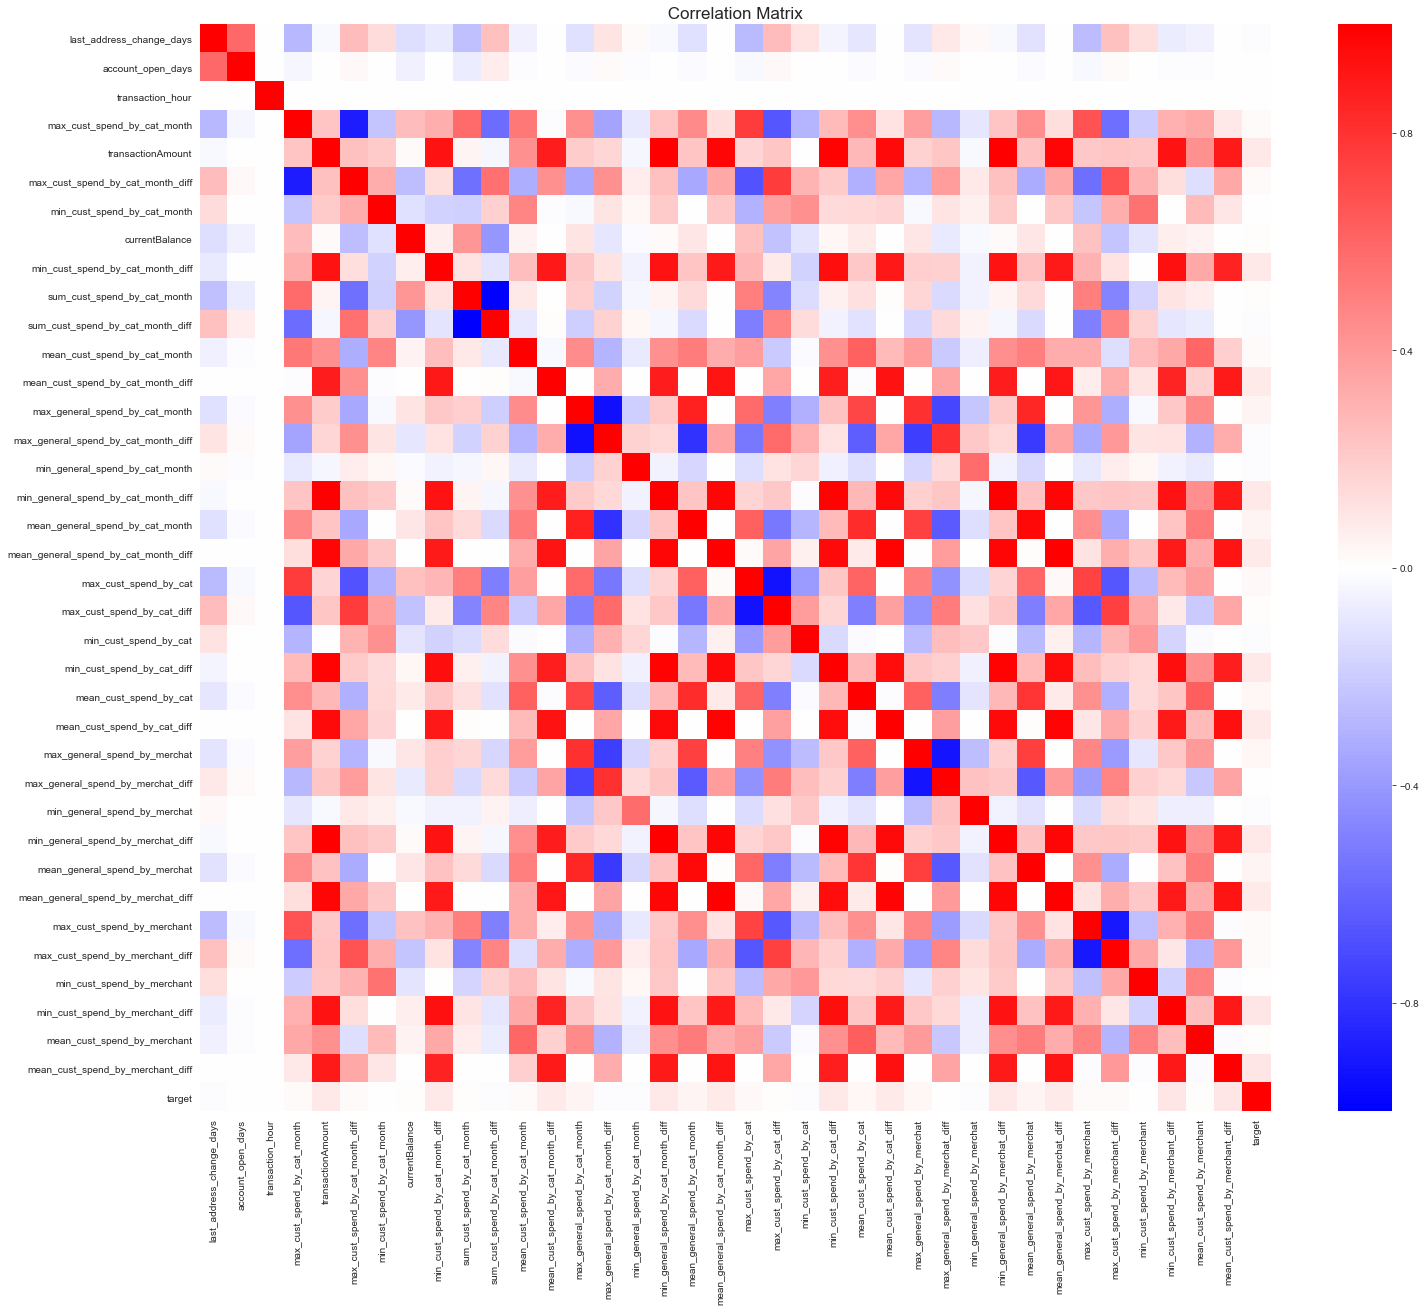

In [137]:
# filtering numerical columns for correlation analysis.
col_for_corr = [
    'last_address_change_days','account_open_days','transaction_hour',
    'max_cust_spend_by_cat_month','transactionAmount',
       'max_cust_spend_by_cat_month_diff', 'min_cust_spend_by_cat_month','currentBalance',
       'min_cust_spend_by_cat_month_diff', 'sum_cust_spend_by_cat_month',
       'sum_cust_spend_by_cat_month_diff', 'mean_cust_spend_by_cat_month',
       'mean_cust_spend_by_cat_month_diff', 'max_general_spend_by_cat_month',
       'max_general_spend_by_cat_month_diff', 'min_general_spend_by_cat_month',
       'min_general_spend_by_cat_month_diff',
       'mean_general_spend_by_cat_month',
       'mean_general_spend_by_cat_month_diff',
       'max_cust_spend_by_cat',
       'max_cust_spend_by_cat_diff', 'min_cust_spend_by_cat',
       'min_cust_spend_by_cat_diff', 'mean_cust_spend_by_cat',
       'mean_cust_spend_by_cat_diff','max_general_spend_by_merchat',
       'max_general_spend_by_merchat_diff', 'min_general_spend_by_merchat',
       'min_general_spend_by_merchat_diff', 'mean_general_spend_by_merchat',
       'mean_general_spend_by_merchat_diff',
        'max_cust_spend_by_merchant',
       'max_cust_spend_by_merchant_diff', 'min_cust_spend_by_merchant',
       'min_cust_spend_by_merchant_diff', 'mean_cust_spend_by_merchant',
       'mean_cust_spend_by_merchant_diff',
                'target']
f, ax = plt.subplots(1, 1, figsize=(24,20))
corr = dict_data[col_for_corr].corr()
g = sns.heatmap(corr, cmap='bwr',annot_kws={'size':20}, ax=ax)
g.set_title(" Correlation Matrix ", fontsize=17)

Observations
1. As we can see, some of the variables are lightly correlated with our target variable. specifically transaction amount, min_cust_spent_by_cat_month_diff, mean_cust_spent_by_cat_month_diff, min_general_spent_by_cat_month_diff and mean_cust_spent_by_cat_month_diff
2. Without claiming any casual inference, it can be said in our data:
    1. Higher the tnx amount, higher the chances of fraud transaction
    2. Higher the difference between tnx amount and min spent on that category and month, higher the chances of that transaction being fraud
    3. Higher the difference between tnx amount and mean spent that category and month, higher the chances of fraud transaction
    4. Same holds when we are talking about difference with general population spending.
    5. Same holds true when we are talking about Transactions with different merchants.
    

### Modelling
There are two ways we can deal with predictive problems with unbalanced classes, Either we can utilize the anamoly detection methods or predictive methods.
Anamoly detection models are trained on normal(non-fraud) class and when abnormal data is supplied, either their entropy, num of splits or reconstruction cost increases which is flagged as outlier or anamoly. However with our distribution plots, it is difficult to ascertian that anamoly detection algorithm will successfully work here.

Second approach is predictive classification, but due to low number of positive class examples, our model can be biased due, however we do have about 2% of positive classes, which is not extreme imbalance, so we can test this approach, though SMOTE oversampling would be useful here, I would have tried that given more time.
While creating the Model we need to be careful in selecting the validation data evaluation metric, due to unbalanced classes, Accuracy and recall are not good metrics, so we will use AUC which is not affected by the class imbalance. We could have tried other metrics such as F1 score etc given more time.

Further the choice of my model is catboost, there are various reasons for that:
1. Unlike decision trees, GBMs are not very sensitive to unbalanced classes,
2. Catboost automatically takes care of the cateogrical variables and also creates mean encodings for categorical features.
3. It is unaffected by normality assumptions, multicollinearity issues and other assumptions which affect logistic regression.
4. No need to convert categorical variables to one-hot or hash

In [163]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [152]:
X.head()

,cardPresent,creditLimit,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,merchantName,posEntryMode,posOnPremises,posConditionCode,last_address_change_days,account_open_year,transactionType,transaction_day,transaction_hour,transaction_month,account_open_days,max_cust_spend_by_cat_month,transactionAmount,max_cust_spend_by_cat_month_diff,min_cust_spend_by_cat_month,currentBalance,min_cust_spend_by_cat_month_diff,sum_cust_spend_by_cat_month,sum_cust_spend_by_cat_month_diff,mean_cust_spend_by_cat_month,mean_cust_spend_by_cat_month_diff,max_general_spend_by_cat_month,max_general_spend_by_cat_month_diff,min_general_spend_by_cat_month,min_general_spend_by_cat_month_diff,mean_general_spend_by_cat_month,mean_general_spend_by_cat_month_diff,max_cust_spend_by_cat,max_cust_spend_by_cat_diff,min_cust_spend_by_cat,min_cust_spend_by_cat_diff,mean_cust_spend_by_cat,mean_cust_spend_by_cat_diff,max_general_spend_by_merchat,max_general_spend_by_merchat_diff,min_general_spend_by_merchat,min_general_spend_by_merchat_diff,mean_general_spend_by_merchat,mean_general_spend_by_merchat_diff,max_cust_spend_by_merchant,max_cust_spend_by_merchant_diff,min_cust_spend_by_merchant,min_cust_spend_by_merchant_diff,mean_cust_spend_by_merchant,mean_cust_spend_by_merchant_diff
0,False,5000,0.00,False,rideshare,Lyft,05,,01,523,2014,PURCHASE,4,19,1,523,247.99,111.33,-136.66,24.75,0.00,86.58,538.78,-427.45,134.695,-23.365,1362.27,-1250.94,0.02,111.31,149.688887,-38.358887,665.21,-553.88,0.98,110.35,121.171375,-9.841375,1191.98,-1080.65,0.02,111.31,149.873811,-38.543811,379.10,-267.77,3.13,108.20,109.975946,1.354054
1,False,5000,111.33,False,rideshare,Uber,09,,01,524,2014,PURCHASE,5,22,1,524,247.99,24.75,-223.24,24.75,111.33,0.00,538.78,-514.03,134.695,-109.945,1362.27,-1337.52,0.02,24.73,149.688887,-124.938887,665.21,-640.46,0.98,23.77,121.171375,-96.421375,1362.27,-1337.52,0.06,24.69,149.500605,-124.750605,665.21,-640.46,0.98,23.77,130.804651,-106.054651
2,False,5000,136.08,False,rideshare,Lyft,05,,01,526,2014,PURCHASE,0,13,1,526,247.99,187.40,-60.59,24.75,136.08,162.65,538.78,-351.38,134.695,52.705,1362.27,-1174.87,0.02,187.38,149.688887,37.711113,665.21,-477.81,0.98,186.42,121.171375,66.228625,1191.98,-1004.58,0.02,187.38,149.873811,37.526189,379.10,-191.70,3.13,184.27,109.975946,77.424054
3,False,5000,323.48,False,rideshare,Lyft,02,,01,526,2014,PURCHASE,0,22,1,526,247.99,227.34,-20.65,24.75,323.48,202.59,538.78,-311.44,134.695,92.645,1362.27,-1134.93,0.02,227.32,149.688887,77.651113,665.21,-437.87,0.98,226.36,121.171375,106.168625,1191.98,-964.64,0.02,227.32,149.873811,77.466189,379.10,-151.76,3.13,224.21,109.975946,117.364054
4,False,5000,550.82,False,rideshare,Lyft,02,,01,531,2014,ADDRESS_VERIFICATION,5,1,1,531,247.99,0.00,-247.99,24.75,550.82,-24.75,538.78,-538.78,134.695,-134.695,1362.27,-1362.27,0.02,-0.02,149.688887,-149.688887,665.21,-665.21,0.98,-0.98,121.171375,-121.171375,1191.98,-1191.98,0.02,-0.02,149.873811,-149.873811,379.10,-379.10,3.13,-3.13,109.975946,-109.975946


In [166]:
col_for_model = ['cardPresent','creditLimit','currentBalance','expirationDateKeyInMatch',
                 'merchantCategoryCode','merchantName','posEntryMode','posOnPremises','posConditionCode',
                 'last_address_change_days','account_open_year','transactionType',
                 'transaction_day', 'transaction_hour', 'transaction_month','account_open_days',
    'max_cust_spend_by_cat_month','transactionAmount',
       'max_cust_spend_by_cat_month_diff', 'min_cust_spend_by_cat_month','currentBalance',
       'min_cust_spend_by_cat_month_diff', 'sum_cust_spend_by_cat_month',
       'sum_cust_spend_by_cat_month_diff', 'mean_cust_spend_by_cat_month',
       'mean_cust_spend_by_cat_month_diff', 'max_general_spend_by_cat_month',
       'max_general_spend_by_cat_month_diff', 'min_general_spend_by_cat_month',
       'min_general_spend_by_cat_month_diff',
       'mean_general_spend_by_cat_month',
       'mean_general_spend_by_cat_month_diff',
       'max_cust_spend_by_cat',
       'max_cust_spend_by_cat_diff', 'min_cust_spend_by_cat',
       'min_cust_spend_by_cat_diff', 'mean_cust_spend_by_cat',
       'mean_cust_spend_by_cat_diff','max_general_spend_by_merchat',
       'max_general_spend_by_merchat_diff', 'min_general_spend_by_merchat',
       'min_general_spend_by_merchat_diff', 'mean_general_spend_by_merchat',
       'mean_general_spend_by_merchat_diff',
        'max_cust_spend_by_merchant',
       'max_cust_spend_by_merchant_diff', 'min_cust_spend_by_merchant',
       'min_cust_spend_by_merchant_diff', 'mean_cust_spend_by_merchant',
       'mean_cust_spend_by_merchant_diff']
X = dict_data[col_for_model]
X.fillna(0.0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, dict_data.target, test_size=0.25, random_state=1, stratify=dict_data.target)

/Users/212717082/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [178]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=13,
                             eval_metric='AUC',
                             random_seed = 1,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 100,
                             od_wait=100)

In [179]:
cat_cols = [0,3,4,5,6,7,8,10,11,12,13,14]
clf.fit(X_train,y_train,cat_features=cat_cols)

0:	total: 2.27s	remaining: 18m 51s
100:	total: 3m 22s	remaining: 13m 20s
200:	total: 6m 59s	remaining: 10m 24s
300:	total: 10m 37s	remaining: 7m 1s
400:	total: 14m 14s	remaining: 3m 31s
499:	total: 18m	remaining: 0us


In [180]:
yhat_test = clf.predict(X_test)
yhat_train = clf.predict(X_train)

In [181]:
print('Performance on Train Set')
print(classification_report(y_train, yhat_train))

Performance on Train Set
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00    472959
        1.0       1.00      0.54      0.70      8476

avg / total       0.99      0.99      0.99    481435



In [182]:
print('Performance on Test Set')
print(classification_report(y_test, yhat_test))

Performance on Test Set
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00    157653
        1.0       0.99      0.53      0.69      2826

avg / total       0.99      0.99      0.99    160479



/Users/212717082/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


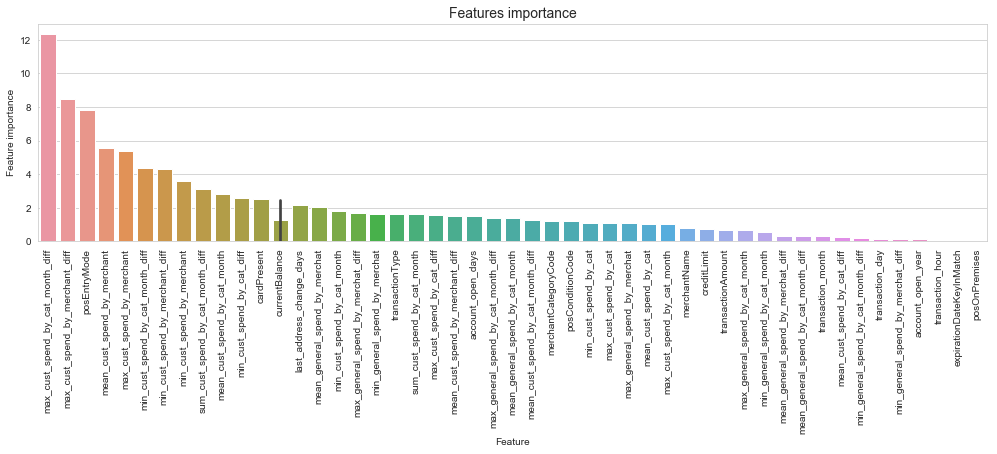

In [183]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (17,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

#### Short note about the model
1. The model has **99% precision**, implying that Frauds will be captured with very high accuracy.
2. The model has **53% recall**, meaning that it can detect more than half of the frauds.
3. Performance of the model is same on both train and test set and I have precluded every possiblity of data leakage, thus this model is **not overfitting**.
4. The model might be underfitting and proper hyperparameter tuning is required to give the required complexity to the model(would have done given more time)
5. We can see that the feature engineering I did such as Spending behaviour related features are really useful for seperating the fraud transactions from feature importance. Such as **max_cust_spend_by_month_diff**
6. In conclusion, this model is of help in detecting fraud transactions.

Things would have tried if got more time

**1. Features:**
    1. Would have created features to check repeat transaction. If a customer is making transaction of similar amount and with same merchant, it might be a honest mistake by the customer and he will call the previous transaction as fraud. 
    2. With Unbalanced classes, oversampling and undersampling techniques like SMOTE are really usefull, I Would have done that to make class ratios better. Also I Would have tweaked the penalty for misclassification to increase sensitivity towards fraud transactions.
    3. After looking at Feature importance, I would have tried removing some of the irrelavant feature so that model cannot overfit on noise.
    4. Also would have done some heirarchical clustering to group similar features and remove them from the model.
    
**2. Hyperparameter Tuning:** 
    1. Right now I am using paramters which has worked best for me in the past, I didn't performed any tuning at all, but would really have tried to tweak the hyperparameters for best outcome. I would have probably used a grid search or genetic algorithms to get the best set of hyperparameters.
    2. Also would have tried k-fold cross validation to build several models and then taken the mean value of thier predictions.
    3. Since we are talking about Fraud, We would like recall to be higher since we want to capture all the Frauds, even through precision is lesser, we can call the customer to get confirmation about the fraud or temporarily  block his card. With better tuning, we can make recall approachable to 1. 
    4. I would have deployed cost senstive approach to assign different misclassification cost for making the recall approaching to 1.
**3. Alternative Models:** 
    1. I would have tried Anamoly detection algorithm such as Isolation Forest, Autoencoders, and predictive models such as Structured Deep Learning Models, Random Forest.
    2. Different models train differntly have their own set of bias and varinace, I would have tried to ensemble multiple models to reduce the variance of my outputs.
**4. Model explaination:** Would have provided a detailed explaination of this work.
    1. Particularly on the side of creating partial dependence plots which will tell what is the exclusive relationship of target variable with a feature.
    2. Also would have provided tips to reduced the frauds using model inference. 
